### Prelude to Week 7: Wrap-up of last Week's Exercise 5

Before starting with today's class, here is a quick exercise for you to get feedback on the project ideas you have put together last week. You will work with another group for this one. Remember that, at any time, you can come to me and get advice. 

> _Exercise: Exchange feedback on Project ideas._
> 1. __Team-up__ with another group, and find a time to meet. Here is the list of group pairs that should work together:
>      * Group 1 and Group 2 (August, Asger and Søren?)
>      * Group 3 and Group 4
>      * Group 5 and Group 6
>      * Group 8 and Group 9 
> 2. One group at the time, __present__ your slide from Week 6, Exercise 5 to the other group in less than 5 minutes. Allow some time for questions at the end.
> 4. __Write down__ in your notebook (in a few lines): 
>       * Which topic is the other group going to study? 
            - Sentiment analysis on Github Issues
>       * Which questions do they aim at addressing?
            - Map the sentiment of issues based on different programming languages e.g. Are Java programmers more irritated than Python programmers.
>       * Which data will they use?
            - Github issues maybe issues from other platforms as well or Stack Overflow
> 5. __Discuss__ within your group and write in your notebook: 
>       * What is the most interesting aspect in the study designed by the other group?
            - The insights into programmer culture, since cult like cummunities can form around specific programming languages
>       * Is the data suitable to answer the questions they want to address? Why?
            - To some degree. It will give insights into knowledge sharing and issues/problem sovling on a community level. But a lot of community communication might also happen in privat chat rooms.
>       * Is it feasible to collect the data? If not, why?
            - Yes, all the data is openly accessible on the web.
>       * What are some potential limits of the data they have chosen to use for the study?
            - It might be difficult to combine data from different platforms as the user accounts are different. They probably have to categorize the data first and combine issues and data from stack overflow if they choose to use both.
            - If they only choose Github issues then the data should be okay to get and process. But, the projects they will have access to is only the public projects. So they will be able to map the open-source programming culture. However, the coorperate programmers will likely have quite a lot of private projects that will not be available. So they will most likely only get to map part of the programming culture. 
>       * Can their study questions be answered using the techniques of data visualization, network and text analyses that we have seen in class? 
            - Yes. Network and text analysis should do it and then visualizations such as word clouds or networks based on programming languages.
> 6. Share the feedback with your paired group! Remember to be caring and constructive :)

# Overview of Today's class

And now let's move to the main part of the class. The plan for today is to work on Sentiment Analysis. As usual, we will first focus a bit on the theory, and then apply what we have learnt through some exercises. Here is an overview of the programme:
> * Part 1: __Introduction to Sentiment Analysis__
> * Part 2: __Dictionary-based methods__
> * Part 3: __Wordshifts__
> * Part 4: __(dictionary & rule)-based methods__

# Part 1: Intro to Sentiment Analysis

Let's start with a short introduction to sentiment analysis. You will learn what is sentiment analysis, what we use it for, and what are the main methods for sentiment analysis. 

 
> **Video lecture**: [Intro to Sentiment Analysis](https://www.youtube.com/watch?v=QXfE0Dxb_0c&ab_channel=LauraAlessandretti)

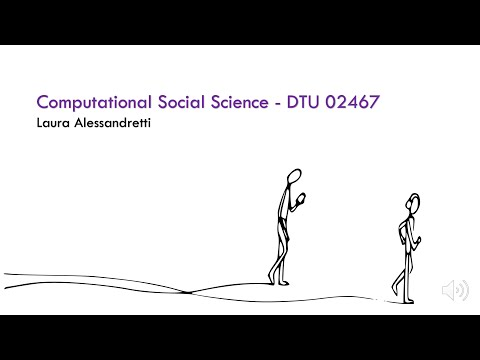

In [125]:
from IPython.display import YouTubeVideo
YouTubeVideo("QXfE0Dxb_0c",width=800, height=450)

And now let's continue with some reading. I suggest you to have a look at the paper below, where the authors show how they build the labMT dictionary for sentiment analysis and used it to study Twitter data. There is __no need for you to read it all__. Just read through the abstracts, have a look at the figures, and get a sense for the methodology.
> **Reading**: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752)

Don't forget to have a look at the interactive [Hedonometer](http://hedonometer.org/), which is built using the method described in the paper.

> _Exercise 1: Exploring the LabMT dataset_ 
>    1. Download the labMT dictionary from [here](https://hedonometer.org/words/labMT-en-v2). 
>   

2. Explain in your own words __how it was collected__. You can find the information [in the original paper, section 2.2](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752)

They analyzed Tweets from a period of 33 months containing 46 billion words from over 63 million unique users.
They chose 10.000 words from this data based on the frequency of usage and surveyed people about what sentiment they thought the words had.

> 3. Explore the labMT data. 
    * What are the top 10 words by happiness score, and the bottom 10? Does this surprise you?


In [1]:
import pandas as pd

hedonometer = pd.read_csv('Data/week7/Hedonometer.csv')

In [9]:
top = 10
print(f'Top {top} words on happiness score')
hedonometer.sort_values('Happiness Score', ascending=False).head(top)

Top 10 words on happiness score


,Rank,Word,Word in English,Happiness Score,Standard Deviation of Ratings
0,0,laughter,laughter,8.50,0.93
1,1,happiness,happiness,8.44,0.97
2,2,love,love,8.42,1.11
3,3,happy,happy,8.30,0.99
4,4,laughed,laughed,8.26,1.16
5,5,laugh,laugh,8.22,1.37
6,6,laughing,laughing,8.20,1.11
8,8,laughs,laughs,8.18,1.16
7,7,excellent,excellent,8.18,1.10
9,9,joy,joy,8.16,1.06


In [10]:
bottom = 10
print(f'Bottom {bottom} words on happiness score')
hedonometer.sort_values('Happiness Score').head(bottom)

Bottom 10 words on happiness score


,Rank,Word,Word in English,Happiness Score,Standard Deviation of Ratings
10168,10168,suicide,suicide,1.30,0.84
10169,10169,terrorist,terrorist,1.30,0.91
10171,10171,coronavirus,coronavirus,1.34,0.66
10167,10167,rape,rape,1.44,0.79
10165,10165,murder,murder,1.48,1.01
10166,10166,terrorism,terrorism,1.48,0.91
10163,10163,cancer,cancer,1.54,1.07
10164,10164,death,death,1.54,1.28
10160,10160,died,died,1.56,1.20
10161,10161,kill,kill,1.56,1.05


The words and their happiness score seems to make sense. Also, coronavirus is a bad part of many people's life, so it makes sense, that it has worked its way to the bottom of the happiness score list.

* What are the top 20 controversial words (those for which annotators' ratings disagree the most)? Why do you think they are controversial?

In [12]:
top = 20
print(f'Top {top} controversial words (words with greatest disagreement amongst annotators i.e. greatest Rating std')
hedonometer.sort_values('Standard Deviation of Ratings', ascending=False).head(top)

Top 20 controversial words (words with greatest disagreement amongst annotators i.e. greatest Rating std


,Rank,Word,Word in English,Happiness Score,Standard Deviation of Ratings
8389,8389,fucking,fucking,4.64,2.93
9211,9211,fuckin,fuckin,3.86,2.74
9417,9417,fucked,fucked,3.56,2.71
7990,7990,pussy,pussy,4.80,2.67
3768,3768,whiskey,whiskey,5.72,2.64
9410,9410,slut,slut,3.57,2.63
9600,9600,cigarettes,cigarettes,3.31,2.60
8991,8991,fuck,fuck,4.14,2.58
8748,8748,mortality,mortality,4.38,2.55
9715,9715,cigarette,cigarette,3.09,2.52


* Plot the histogram showing words sentiment according to the labMT data. Do you notice anything that you find surprising? Does the labMT data support the _"Pollyanna hypothesis"_ in psychology? And how? [This article](https://www.pnas.org/content/112/8/2389) is a good starting point to read about the Pollyanna hypothesis.

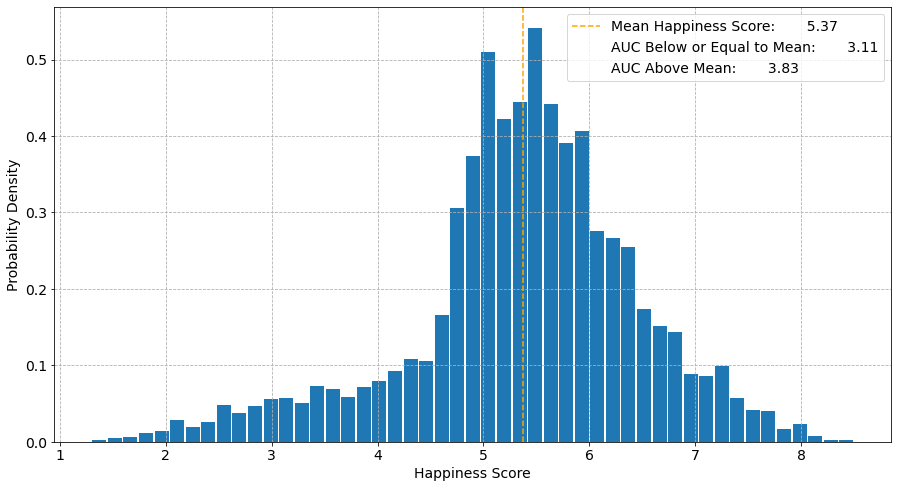

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

mpl.rc('font', **{'size': 14})

# Histogram binning
bins = np.linspace(hedonometer['Happiness Score'].min(), hedonometer['Happiness Score'].max(), 50)
width = bins[1]-bins[0]
hist, edges = np.histogram(hedonometer['Happiness Score'], bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2

# Calculate mean Happiness Score to check distribution for Pollyanna hypothesis
mean_hs = hedonometer['Happiness Score'].mean()

# Calculate below/average happiness auc and above average happiness auc
below_equal_mean = []
above_mean = []

for i in range(len(values)):
    if bins[i] > mean_hs:
        above_mean.append(values[i])
    else:
        below_equal_mean.append(values[i])

auc_below_equal_mean = sum(below_equal_mean)
auc_above_mean = sum(above_mean)

# Plot Happiness histogram
fig,ax = plt.subplots(figsize=(15,8))
ax.bar(x, hist, width=width*0.9)
plt.axvline(mean_hs, color='orange', linestyle='--', label=f'Mean Happiness Score: {mean_hs:10.2f}')
plt.grid(linestyle='--')
handles, labels = ax.get_legend_handles_labels()
handles.append(mpatches.Patch(color='none', label=f'AUC Below or Equal to Mean: {auc_below_equal_mean:10.2f}'))
handles.append(mpatches.Patch(color='none', label=f'AUC Above Mean: {auc_above_mean:10.2f}'))
plt.legend(handles=handles)

plt.xlabel('Happiness Score')
plt.ylabel('Probability Density')
plt.show()

A greater density above the mean happiness score supports the Pollyanna hypothesis of a generally more positive language use than negative language use.

>    4. Using the labMT data, create a function that, given a document (list of tokens), returns the corresponding "Happiness Score" (see equation 1 in the article). Words that do not exist in the labMT dataset can be ignored.

In [72]:
import nltk

word_happiness_score = dict(zip(hedonometer['Word'].apply(lambda w: w.lower()), hedonometer['Happiness Score']))

def happiness_score(doc):
    tokens = nltk.tokenize.word_tokenize(doc)
    return sum([word_happiness_score[t] for t in tokens if t.lower() in word_happiness_score])

# Part 2:  Dictionary-based methods.

The goal for this part of the class is to use the labMT data for studying happiness over time on _r/wallstreetbets_, building on dictionary-based methods. We will re-use some of the code from last week. So, make sure you have it at hand.

> _Exercise 2: Dictionary-based method to study sentiment on r/wallstreetbets_ 


>    1. Open the _wallstreetbets submissions dataframe_ we used in Week 6 (my version is [here](https://github.com/lalessan/comsocsci2021/blob/master/data/wallstreet_subs.csv.gz)).
>    2. Tokenize the _text_ of each submission (use the code you created in Week 6, exercise 3, point 2). Add it in a new column of your dataframe called "tokens".
>    3. Create one document per day in the dataset, containing all tokens for that day. Plot the length of the document (number of tokens) over time. Are documents long enough for using a dictionary-based method? As a rule-of-thumb  that 10,000 words are enough to score with a sentiment dictionary confidently ([Source here](https://epjdatascience.springeropen.com/articles/10.1140/epjds/s13688-017-0121-9)).
>    4. Plot the average daily happiness on r/wallstreetbets using the function you created in step 3 (remember the video lesson in Week 2, for plotting nice time-series).
>    5. Compare happiness on _r/wallstreetbets_ to happiness on Twitter using the [hedonometer](http://hedonometer.org/timeseries/en_all/?from=2019-09-16&to=2021-03-15). What is (approximatively) the average value of the two time-series? How do you explain any difference between the two?
>    6. Download the daily Close price of the [S&P 500 Index](https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC) and plot it over time. This index measures the stock performance of 500 large companies listed on stock exchanges in the United States, you can read more about it in the [S&P 500 Wikipedia page](https://en.wikipedia.org/wiki/S%26P_500).
>    7. Compare the figures you created in steps 8. and 10. What do you observe? 
>    8. Discuss the limitations of your analysis. 

# Part 3: Word Shifts

Dictionary-based methods give us a way to measure the sentiment polarity for a given document. But which words contribute the most to make a document more sad/happy than another? We will now dig into _'Word Shifts'_, a method for understanding which words contribute to increasing or decreasing polarity.

Start by looking at the video below, where Peter Dodds, one of the authors of the Hedonometer, shows what are __Words Shift__ and how to use them.
> **Video**: [Word Shifts by Peter Dodds](https://www.youtube.com/watch?v=Z0M2k8TQ-t8&ab_channel=PeterSheridanDodds)

Now, have a look at the video lecture below, where I show how to plot WordShifts in Python. If you watch it carefullly, you will nail the next exercise ;)
> **Video Lecture**: [Word Shifts in Python](https://youtu.be/UIv5Aluo-xI)

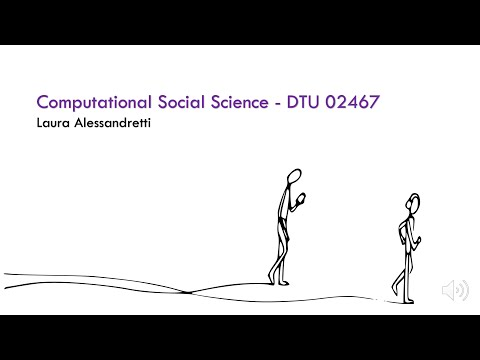

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("UIv5Aluo-xI",width=800, height=450)

_Exercise : Creating Word Shifts_
>    1. Pick a day of your choice in 2020. We call it $d$. It is more interesting if you pick a day where you expect something relevant to occur (e.g. Christmas, New Year, Corona starting, the market crashes...).
>    2. Build two lists $l$ and $l_{ref}$ containing all tokens for submissions posted on r/wallstreebets on day $d$, and in the 7 days preceding day $d$, respectively. 
>    3. For each token $i$, compute the relative frequency in the two lists $l$ and $l_{ref}$. We call them $p(i,l)$ and $p(i,l_{ref})$, respectively. The relative frequency is computed as the number of times a token occurs over the total length of the document. Store the result in a dictionary.
>    4. For each token $i$, compute the difference in relative frequency $\delta p(i) = p(i,l) - p(i,l_{ref})$. Store the values in a dictionary. Print the top 10 tokens (those with largest relative frequency). Do you notice anything interesting?
>    5. Now, for each token, compute the happiness $h(i) = labMT(i) - 5$, using the labMT dictionary. Here, we subtract $5$, so that positive tokens will have a positive value and negative tokens will have a negative value. Then, compute the product $\delta \Phi = h(i)\cdot \delta p(i)$. Store the results in a dictionary. 
>    6. Print the top 10 tokens, ordered by the absolute value of $|\delta \Phi|$. Explain in your own words the meaning of $\delta \Phi$. If that is unclear, have a look at [this page](https://shifterator.readthedocs.io/en/latest/cookbook/weighted_avg_shifts.html).
>    7. Now install the [``shifterator``](https://shifterator.readthedocs.io/en/latest/installation.html) Python package. We will use it for plotting Word Shifts. 
>    8. Use the function ``shifterator.WeightedAvgShift`` to plot the WordShift, showing which words contributed the most to make your day of choice _d_ happier or more sad then days in the preceding 7 days. Comment on the figure. 
>    9. How do words that you printed in step 6 relate to those shown by the WordShift? 

# Part 4: (dictionary & rule)-based methods

We will now explore another method for sentiment analysis, called [VADER](https://github.com/cjhutto/vaderSentiment), which uses **both** dictionary-based methods and rule-based methods. My introductory lecture above has covered the basic functioning of VADER. If you are interested in finding out more, you can find more material in the [original article](https://ojs.aaai.org/index.php/ICWSM/article/download/14550/14399).

> _Exercise 2: Using VADER to investigate polarity in r/wallstreetbets_ 

>    1. Download the VADER lexicon dictionary from [here](https://raw.githubusercontent.com/cjhutto/vaderSentiment/master/vaderSentiment/vader_lexicon.txt). Read the description of the VADER lexicon in the README file of [VADER Github repo](https://github.com/cjhutto/vaderSentiment). How was the dictionary created? 
>    2. Explore the VADER lexicon data. 
        * What are the top 10 words by polarity. And the bottom 10? Does this surprise you?
        * Plot the distribution of polarity according to the VADER Lexicon data. What are the differences compared to the labMT data? Is it to be expected?
>    3. Install the VADER library using ``pip install vaderSentiment``.
>    4. Go through the example sentences in the [vaderSentiment documentation page](https://github.com/cjhutto/vaderSentiment) (Section Code Examples). Compute the _compund_  polarity for each sentence. 
>    5. Try VADER on your own sentences. Can you find a sentence where VADER gets wrong (the polarity has opposite sign compared to what one would expect)? You can have a look at VADER set of rules [here](https://ojs.aaai.org/index.php/ICWSM/article/download/14550/14399). 
>    6. Now open the _wallstreetbets submissions dataframe__. Divide the text of each submission into sentences (you can use ``nltk.sent_tokenize``). Apply VADER to each individual sentence. Then compute the average polarity for each submission.
>    7. Aggregate by day and compute the average daily compund polarity. Plot the curve over time (Optional: add error-bars using the standard deviation). Does this curve look different to the one you obtained in Part 2. How do you explain it?
>    8. What is the advantage of using a rule-based method over the simple dictionary-based approach? What type of analyses could you imagine doing on the Reddit dataset using VADER that you can not do using dictionary approaches?